In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import json
from datetime import datetime
import glob

# Load data from one file as a POC
with open('data/heartRate_2025-07-07.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert datetime strings to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract hour as feature
df['hour'] = df['datetime'].dt.hour

# Prepare X (features) and y (target)
X = df[['hour']]
y = df['heart_rate']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error metrics
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)

print(f"Model Performance:")
print(f"Root Mean Square Error: {rmse:.2f} BPM")
print(f"R² Score: {r2:.3f}")
print("\nModel Coefficients:")
print(f"Slope (change in HR per hour): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Model Performance:
Root Mean Square Error: 11.63 BPM
R² Score: 0.298

Model Coefficients:
Slope (change in HR per hour): 1.15
Intercept: 56.81


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


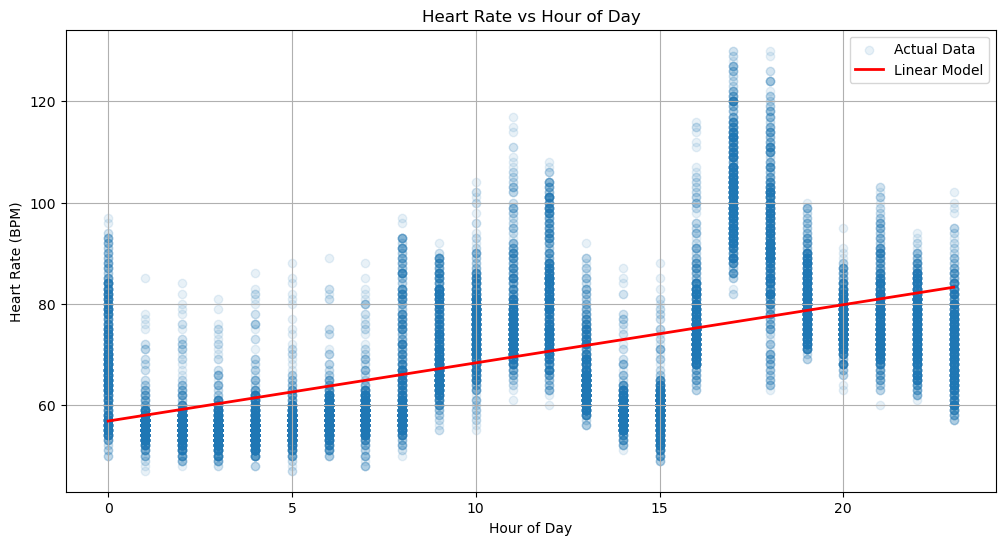

In [2]:
import matplotlib.pyplot as plt

# Create hour values for prediction
hours = np.arange(24).reshape(-1, 1)
predicted_hr = model.predict(hours)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['hour'], df['heart_rate'], alpha=0.1, label='Actual Data')
plt.plot(hours, predicted_hr, color='red', linewidth=2, label='Linear Model')
plt.xlabel('Hour of Day')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate vs Hour of Day')
plt.legend()
plt.grid(True)
plt.show()
